In [1]:
from train import Train
from modeling.model_transfer_learning import DenseNetTransferModel

In [2]:
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import config
from hive_dataset import HiveDataset

In [5]:
from torchvision import transforms

In [17]:
from model import CNNModel

In [6]:
from torchvision.models.densenet import DenseNet121_Weights

transforms_dense_net = DenseNet121_Weights.DEFAULT.transforms()

transforms_dense_net

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [7]:
metadata_column_names = ['device', 'hive number', 'date', 'hive temp', 'hive humidity',
        'hive pressure', 'weather temp', 'weather humidity', 'weather pressure',
        'wind speed', 'gust speed', 'weatherID', 'cloud coverage', 'rain',
        'lat', 'long', 'file name', 'queen presence', 'queen acceptance',
        'frames', 'target', 'time', 'queen status']
metadata = np.load(config.PROCESSED_METADATA_FILE, allow_pickle=True)
metadata_df = pd.DataFrame(metadata, columns=metadata_column_names)

# TODO: Remove
metadata_df = metadata_df.head(2000)

# Train, test, val split
metadata_train, metadata_test = train_test_split(metadata_df, train_size=0.7, shuffle=True, random_state=42)
metadata_val, metadata_test = train_test_split(metadata_test, train_size=0.5, shuffle=True, random_state=42)

# dataset = HiveDataset(metadata_path=config.PROCESSED_METADATA_FILE, processed_data_path=config.PROCESSED_DATA_PATH, target_feature=config.TARGET_FEATURE)
train_dataset = HiveDataset(metadata_df=metadata_train, processed_data_path=config.PROCESSED_DATA_PATH, target_feature=config.TARGET_FEATURE, transform=transforms_dense_net, fake_rgb=True)
val_dataset = HiveDataset(metadata_df=metadata_val, processed_data_path=config.PROCESSED_DATA_PATH, target_feature=config.TARGET_FEATURE, transform=transforms_dense_net, fake_rgb=True)
test_dataset = HiveDataset(metadata_df=metadata_test, processed_data_path=config.PROCESSED_DATA_PATH, target_feature=config.TARGET_FEATURE, transform=transforms_dense_net, fake_rgb=True)

In [8]:
next(iter(train_dataset))[0].shape

torch.Size([3, 224, 224])

In [9]:
metadata_df["queen status"].value_counts()

queen status
2    845
0    694
1    311
3    150
Name: count, dtype: int64

In [10]:
trainer = Train()

Layer (type:depth-idx)                   Param #
CNNModel                                 --
├─Conv2d: 1-1                            160
├─Conv2d: 1-2                            4,640
├─Conv2d: 1-3                            18,496
├─Conv2d: 1-4                            73,856
├─MaxPool2d: 1-5                         --
├─Flatten: 1-6                           --
├─Linear: 1-7                            15,777,856
├─Linear: 1-8                            260
Total params: 15,875,268
Trainable params: 15,875,268
Non-trainable params: 0


In [11]:
trainer.train_cnn()

Training will happen on cuda.
EPOCH 1


100%|██████████| 2485/2485 [09:17<00:00,  4.46it/s]


LOSS train 1.522 valid 1.279
EPOCH 2


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.370
EPOCH 3


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 1.229
EPOCH 4


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.098
EPOCH 5


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.075
EPOCH 6


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 0.992
EPOCH 7


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.310
EPOCH 8


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 0.999
EPOCH 9


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.245
EPOCH 10


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 1.128
EPOCH 11


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.093
EPOCH 12


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.347
EPOCH 13


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.224 valid 1.036
EPOCH 14


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.102
EPOCH 15


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.224 valid 1.157
EPOCH 16


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 0.994
EPOCH 17


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.307
EPOCH 18


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.074
EPOCH 19


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.224 valid 1.232
EPOCH 20


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.088
EPOCH 21


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.114
EPOCH 22


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.281
EPOCH 23


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 1.072
EPOCH 24


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.143
EPOCH 25


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.140
EPOCH 26


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.233
EPOCH 27


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.042
EPOCH 28


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.108
EPOCH 29


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.159
EPOCH 30


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.200
EPOCH 31


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.251
EPOCH 32


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.162
EPOCH 33


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.296
EPOCH 34


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.103
EPOCH 35


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.136
EPOCH 36


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.081
EPOCH 37


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.069
EPOCH 38


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.140
EPOCH 39


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.388
EPOCH 40


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 1.158
EPOCH 41


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.226 valid 0.982
EPOCH 42


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.089
EPOCH 43


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.236
EPOCH 44


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.224
EPOCH 45


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.226 valid 1.221
EPOCH 46


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.220
EPOCH 47


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.304
EPOCH 48


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.025
EPOCH 49


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.103
EPOCH 50


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.285
EPOCH 51


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.194
EPOCH 52


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.110
EPOCH 53


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.194
EPOCH 54


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.162
EPOCH 55


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.023
EPOCH 56


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 1.170
EPOCH 57


100%|██████████| 2485/2485 [09:16<00:00,  4.47it/s]


LOSS train 1.225 valid 0.951
EPOCH 58


100%|██████████| 2485/2485 [09:15<00:00,  4.47it/s]


LOSS train 1.225 valid 1.238
EPOCH 59


100%|██████████| 2485/2485 [09:15<00:00,  4.48it/s]


LOSS train 1.225 valid 1.419
EPOCH 60


100%|██████████| 2485/2485 [09:15<00:00,  4.48it/s]


LOSS train 1.225 valid 1.032


In [18]:
file = '../../models/interim/model_20240702_081829_56.pt'
# model = DenseNetTransferModel()
model = CNNModel()
model.load_state_dict(torch.load(file))

<All keys matched successfully>

In [13]:
# model = trainer.model

In [14]:
from tqdm import tqdm

In [19]:
model.eval()

labels_test = []
predictions_test = []

with torch.no_grad():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Evaluation will happen on {device}.")
    model.to(device)

    for vdata in tqdm(trainer.test_dataloader):
        vinputs, vlabels = vdata
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        voutputs = model(vinputs)
        labels_test.extend(vlabels)
        predictions_test.extend(voutputs)

labels_test = torch.stack(labels_test)
predictions_test = torch.stack(predictions_test)

print(labels_test.shape)

Evaluation will happen on cuda.


100%|██████████| 533/533 [00:45<00:00, 11.79it/s]

torch.Size([1065, 4])


In [20]:
predictions_test[0]

tensor([-0.4174, -0.6333, -0.1537,  0.5947], device='cuda:0')

In [21]:
labels_test[0]

tensor([0., 0., 0., 1.], device='cuda:0')

In [ ]:
from torcheval.metrics import R2Score

ModuleNotFoundError: No module named 'torcheval'

In [ ]:
r2_score = R2Score()
r2_score.update(labels_test, predictions_test)
r2_score.compute()

NameError: name 'R2Score' is not defined

In [ ]:
train_dataloader = trainer.training_dataloader

all_labels = []
for i, data in enumerate(train_dataloader):
    inputs, labels = data
    labels = labels.numpy()
    all_labels.extend(labels)

In [ ]:
all_labels_df = pd.DataFrame(all_labels, columns=["0", "1", "2", "3"])
all_labels_df["0"].value_counts()

0
0.0    922
1.0    478
Name: count, dtype: int64

In [ ]:
all_labels_df["1"].value_counts()

1
0.0    1189
1.0     211
Name: count, dtype: int64

In [ ]:
all_labels_df["2"].value_counts()

2
0.0    792
1.0    608
Name: count, dtype: int64

In [ ]:
all_labels_df["3"].value_counts()

3
0.0    1297
1.0     103
Name: count, dtype: int64

In [22]:
import numpy as np
import pandas as pd

In [23]:
labels_test

tensor([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]], device='cuda:0')

In [24]:
predictions_test[:,0]

tensor([-0.4174, -0.4174, -0.4174,  ..., -0.4174, -0.4174, -0.4174],
       device='cuda:0')

In [25]:
predictions_test[:,1]

tensor([-0.6333, -0.6333, -0.6333,  ..., -0.6333, -0.6333, -0.6333],
       device='cuda:0')

In [26]:
predictions_test[:,2]

tensor([-0.1537, -0.1537, -0.1537,  ..., -0.1537, -0.1537, -0.1537],
       device='cuda:0')

In [27]:
predictions_test[:,3]

tensor([0.5947, 0.5947, 0.5947,  ..., 0.5947, 0.5947, 0.5947], device='cuda:0')

In [28]:
predicted = np.argmax(predictions_test.cpu(), axis=1)
y_index = labels_test.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index.cpu()), pd.Series(predicted))
print(confusion_matrix)
confusion_matrix.index = [f"{label} (predicted)" for label in ["0", "1", "2", "3"]]
confusion_matrix.columns = [label for label in ["0", "1", "2", "3"]]
confusion_matrix

col_0    3
row_0     
0      151
1      146
2      230
3      538


ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements

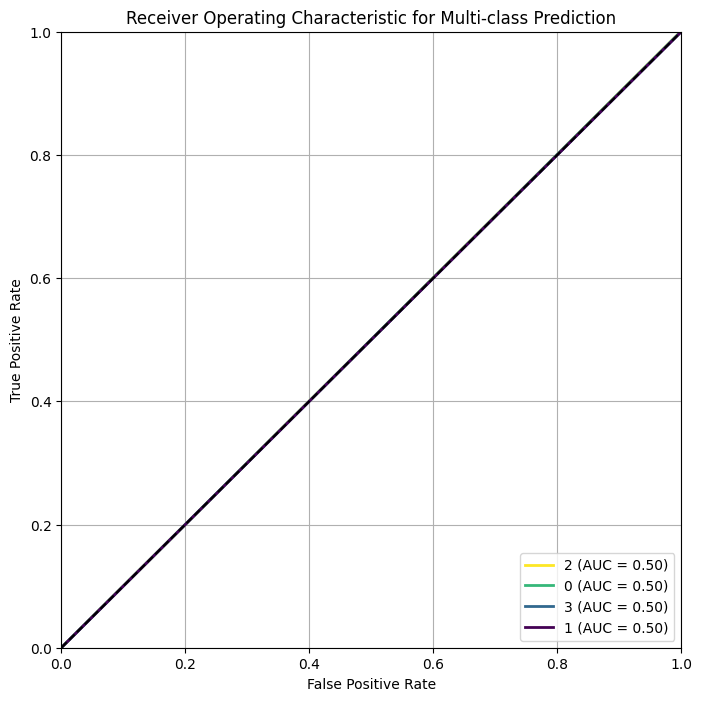

In [ ]:
from model_evaluation import plot_roc_curves
plot_roc_curves(labels_test.cpu(), predictions_test.cpu(), ["0", "1", "2", "3"])